#Auditoria Integrada

---
# **Biblioteca tvdatafeed**
## *Extração de dados TradingView*
---

**Documentação**

https://pypi.org/project/tvdatafeed/

Esta lib foi removida do PyPi. Para consultar a documentação, acesse:

https://github.com/StreamAlpha/tvdatafeed

# 0. Instalação e importação das bibliotecas

Vamos instalar a lib diretamente do seu código-fonte

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/StreamAlpha/tvdatafeed.git to /tmp/pip-req-build-ij0rcoa5
  Running command git clone --filter=blob:none --quiet https://github.com/StreamAlpha/tvdatafeed.git /tmp/pip-req-build-ij0rcoa5
  Resolved https://github.com/StreamAlpha/tvdatafeed.git to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 11.9 MB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=7570 sha256=8c255d012d1621d6ebb632ecb0b55e1b9e85341b9e60537ecf1baf1c63b96837
  Stored in directory: /tmp/pip-ephem-wheel-cache-lrjotl4m/wheels/61/5f/7d/953ab2e3eaea9db6badc898aec3ff220779870e60932341e72
Successfully built tvdatafeed


In [ ]:
from tvDatafeed import TvDatafeed, Interval

import pandas as pd
from datetime import date

# 1. Captura dos dados

Chamar a API

In [ ]:
tv = TvDatafeed()

**Estrutura de código para baixar dados Trading View**

Informar os principais argumentos (existem outros menos específicos que podem ser consultados na documentação):

* symbol (ativo)
* exchange (bolsa onde é negociado)
* interval (timeframe dos dados)
* n_bars (período de cobertura a partir da data atual)


Limite de dados costuma ser aproximadamente 5000 "barras" (varia com o timeframe)

Configuração padrão, sem utilizar usuário/senha

In [ ]:
itub = tv.get_hist(symbol = 'ITUB4', exchange = 'BMFBOVESPA', interval = Interval.in_1_minute, n_bars = 10000)

In [ ]:
itub.shape

(6571, 6)

In [ ]:
itub.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-01-09 13:12:00,BMFBOVESPA:ITUB4,25.00,25.00,24.89,24.95,383900.0
2023-01-09 13:13:00,BMFBOVESPA:ITUB4,24.95,24.97,24.90,24.96,142700.0
2023-01-09 13:14:00,BMFBOVESPA:ITUB4,24.95,24.97,24.92,24.93,34100.0
2023-01-09 13:15:00,BMFBOVESPA:ITUB4,24.94,25.03,24.92,24.97,268200.0
2023-01-09 13:16:00,BMFBOVESPA:ITUB4,24.99,25.00,24.92,24.96,59600.0


**É possível inserir seu usuário e senha do site TradingView para maior lista de ativos disponíveis**

In [ ]:
username = 'YourTradingViewUsername'
password = 'YourTradingViewPassword'

tv = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


**Pesquisar por informações do ativo**

In [ ]:
tv.search_symbol('PETR4', 'BMFBOVESPA')

[{'symbol': 'PETR4',
  'description': 'PETROBRAS PN N2',
  'type': 'stock',
  'exchange': 'BMFBOVESPA',
  'currency_code': 'BRL',
  'logoid': 'brasileiro-petrobras',
  'provider_id': 'ice',
  'country': 'BR',
  'typespecs': ['preferred']},
 {'symbol': 'PETRP',
  'description': 'FUTURE OF PETR4',
  'type': 'futures',
  'exchange': 'BMFBOVESPA',
  'currency_code': 'BRL',
  'logoid': 'brasileiro-petrobras',
  'provider_id': 'ice',
  'country': 'BR',
  'contracts': [{'symbol': 'PETRP1!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: CURRENT CONTRACT IN FRONT'},
   {'symbol': 'PETRP2!',
    'typespecs': ['continuous', 'synthetic'],
    'description': 'CONTINUOUS: NEXT CONTRACT IN FRONT'},
   {'symbol': 'PETRPG2023', 'description': 'FEB 2023'},
   {'symbol': 'PETRPH2023', 'description': 'MAR 2023'}]},
 {'symbol': 'PETR4F',
  'description': 'PETROBRAS PN N2',
  'type': 'stock',
  'exchange': 'BMFBOVESPA',
  'currency_code': 'BRL',
  'logoid': 'brasileiro-petrob

In [ ]:
tv.search_symbol('PETR4', 'BRAZIL')

[]

In [ ]:
tv.search_symbol('amazon', 'NASDAQ')

[{'symbol': 'AMZN',
  'description': 'Amazon.com, Inc.',
  'type': 'stock',
  'exchange': 'NASDAQ',
  'currency_code': 'USD',
  'logoid': 'amazon',
  'provider_id': 'ice',
  'country': 'US',
  'typespecs': ['common']}]

In [ ]:
tv.search_symbol('facebook', 'NASDAQ')

[{'symbol': 'META',
  'description': 'Meta Platforms, Inc.',
  'type': 'stock',
  'exchange': 'NASDAQ',
  'currency_code': 'USD',
  'logoid': 'meta-platforms',
  'provider_id': 'ice',
  'country': 'US',
  'typespecs': ['common']},
 {'symbol': 'FBIO',
  'description': 'Fortress Biotech, Inc.',
  'type': 'stock',
  'exchange': 'NASDAQ',
  'currency_code': 'USD',
  'logoid': 'fortress-biotech',
  'provider_id': 'ice',
  'country': 'US',
  'typespecs': ['common']},
 {'symbol': 'FBNC',
  'description': 'First Bancorp',
  'type': 'stock',
  'exchange': 'NASDAQ',
  'currency_code': 'USD',
  'provider_id': 'ice',
  'country': 'US',
  'typespecs': ['common']},
 {'symbol': 'FBRX',
  'description': 'Forte Biosciences, Inc.',
  'type': 'stock',
  'exchange': 'NASDAQ',
  'currency_code': 'USD',
  'logoid': 'forte-biosciences',
  'provider_id': 'ice',
  'country': 'US',
  'typespecs': ['common']},
 {'symbol': 'FBMS',
  'description': 'The First Bancshares, Inc.',
  'type': 'stock',
  'exchange': 'NA

Outra forma é pesquisar symbols e exchanges no próprio site da TradingView

https://www.tradingview.com/

Exemplo: PETR4

https://www.tradingview.com/symbols/BMFBOVESPA-PETR4/

#### **Extração de índices**

In [ ]:
ibov = tv.get_hist(symbol = 'IBOV', exchange = 'BMFBOVESPA', interval = Interval.in_1_minute, n_bars = 1000)

In [ ]:
ibov.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-01-24 20:14:00,BMFBOVESPA:IBOV,112930.32,112930.32,112884.65,112884.65,0.0
2023-01-24 20:15:00,BMFBOVESPA:IBOV,112874.51,112874.51,112852.97,112852.97,0.0
2023-01-24 20:16:00,BMFBOVESPA:IBOV,112890.71,112890.71,112872.25,112872.25,0.0
2023-01-24 20:17:00,BMFBOVESPA:IBOV,112913.32,112930.35,112913.32,112930.35,0.0
2023-01-24 20:18:00,BMFBOVESPA:IBOV,112958.51,112958.51,112943.93,112943.93,0.0


Vamos remover a informação da exchange

In [ ]:
ticker = 'BMFBOVESPA:IBOV'

In [ ]:
ticker.replace('BMFBOVESPA:', '')

'IBOV'

In [ ]:
ibov['Ativo'] = ibov.symbol.str.replace('BMFBOVESPA:', '')

In [ ]:
ibov.head()

,symbol,open,high,low,close,volume,Ativo
datetime,,,,,,,
2023-01-24 20:14:00,BMFBOVESPA:IBOV,112930.32,112930.32,112884.65,112884.65,0.0,IBOV
2023-01-24 20:15:00,BMFBOVESPA:IBOV,112874.51,112874.51,112852.97,112852.97,0.0,IBOV
2023-01-24 20:16:00,BMFBOVESPA:IBOV,112890.71,112890.71,112872.25,112872.25,0.0,IBOV
2023-01-24 20:17:00,BMFBOVESPA:IBOV,112913.32,112930.35,112913.32,112930.35,0.0,IBOV
2023-01-24 20:18:00,BMFBOVESPA:IBOV,112958.51,112958.51,112943.93,112943.93,0.0,IBOV


Extraindo dados de outros ativos

ETFs

In [ ]:
bova = tv.get_hist(symbol = 'BOVA11', exchange = 'BMFBOVESPA', interval = Interval.in_1_minute, n_bars = 500)

In [ ]:
bova.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-01-25 20:22:00,BMFBOVESPA:BOVA11,110.49,110.51,110.47,110.48,13619.0
2023-01-25 20:23:00,BMFBOVESPA:BOVA11,110.49,110.51,110.48,110.48,13327.0
2023-01-25 20:24:00,BMFBOVESPA:BOVA11,110.48,110.53,110.48,110.48,11917.0
2023-01-25 20:25:00,BMFBOVESPA:BOVA11,110.48,110.51,110.47,110.48,14285.0
2023-01-25 20:26:00,BMFBOVESPA:BOVA11,110.48,110.50,110.47,110.49,13908.0


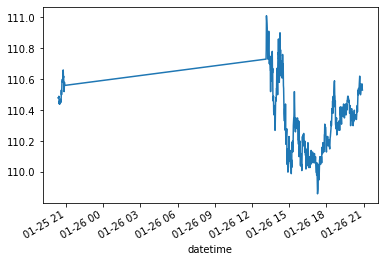

In [ ]:
bova.close.plot();

FIIs

In [ ]:
hglg = tv.get_hist(symbol = 'HGLG11', exchange = 'BMFBOVESPA', interval = Interval.in_1_minute, n_bars = 400)

In [ ]:
hglg.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-01-26 14:15:00,BMFBOVESPA:HGLG11,161.91,161.97,161.91,161.97,15.0
2023-01-26 14:16:00,BMFBOVESPA:HGLG11,161.92,161.99,161.92,161.99,26.0
2023-01-26 14:17:00,BMFBOVESPA:HGLG11,161.95,161.99,161.95,161.99,16.0
2023-01-26 14:18:00,BMFBOVESPA:HGLG11,161.97,161.99,161.95,161.95,27.0
2023-01-26 14:19:00,BMFBOVESPA:HGLG11,161.97,161.99,161.97,161.99,39.0


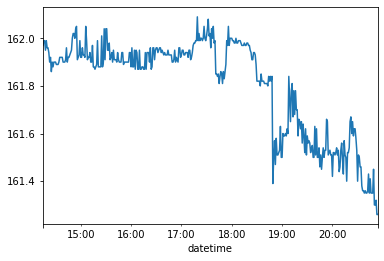

In [ ]:
hglg.close.plot();

In [ ]:
visc = tv.get_hist(symbol = 'VISC11', exchange = 'BMFBOVESPA', interval = Interval.in_daily, n_bars = 400)

In [ ]:
visc.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-23 13:00:00,BMFBOVESPA:VISC11,98.386571,98.386571,97.539476,97.583595,25024.0
2021-06-24 13:00:00,BMFBOVESPA:VISC11,97.548300,98.218917,96.842387,96.860035,31498.0
2021-06-25 13:00:00,BMFBOVESPA:VISC11,96.815915,97.142400,94.195215,94.380517,46931.0
2021-06-28 13:00:00,BMFBOVESPA:VISC11,93.965793,93.974617,88.239077,93.533422,76270.0
2021-06-29 13:00:00,BMFBOVESPA:VISC11,93.498126,95.659983,93.445183,94.151095,29010.0


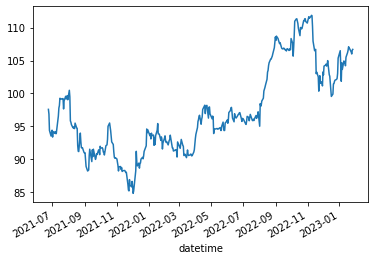

In [ ]:
visc.close.plot();

Commodities

In [ ]:
soja = tv.get_hist(symbol = 'ZSH2023', exchange = 'CBOT', interval = Interval.in_daily, n_bars = 400)

In [ ]:
soja.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-25,CBOT:ZSH2023,1186.00,1186.00,1185.25,1185.25,44.0
2021-06-28,CBOT:ZSH2023,1220.50,1220.50,1220.00,1220.00,1.0
2021-06-29,CBOT:ZSH2023,1218.25,1218.25,1218.25,1218.25,0.0
2021-06-30,CBOT:ZSH2023,1199.25,1268.00,1198.75,1262.75,97.0
2021-07-01,CBOT:ZSH2023,1265.00,1265.00,1256.75,1256.75,2.0


In [ ]:
#esta estratégia mescla análise técnia 3 dois, um uma nova estatégia knf djf ndiofm p

SyntaxError: ignored

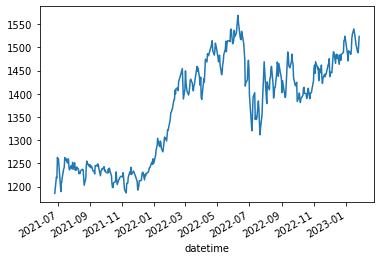

In [ ]:
soja.close.plot();

**Ajustar o fuso horario**

Observe que apesar do fuso horário (timezone) dos dados estar vazio, o padrão da lib é UTC


Para transformar para fuso horário utilizado na B3 (horário de Brasília), primeiro localizamos o índice como UTC e depois convertemos em "America/Sao_Paulo"

In [ ]:
ibov.index[0:10]

DatetimeIndex(['2023-01-24 20:14:00', '2023-01-24 20:15:00',
               '2023-01-24 20:16:00', '2023-01-24 20:17:00',
               '2023-01-24 20:18:00', '2023-01-24 20:19:00',
               '2023-01-24 20:20:00', '2023-01-24 20:21:00',
               '2023-01-24 20:22:00', '2023-01-24 20:23:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [ ]:
ibov = ibov.tz_localize(tz = 'UTC')

In [ ]:
ibov.index

DatetimeIndex(['2023-01-24 20:14:00+00:00', '2023-01-24 20:15:00+00:00',
               '2023-01-24 20:16:00+00:00', '2023-01-24 20:17:00+00:00',
               '2023-01-24 20:18:00+00:00', '2023-01-24 20:19:00+00:00',
               '2023-01-24 20:20:00+00:00', '2023-01-24 20:21:00+00:00',
               '2023-01-24 20:22:00+00:00', '2023-01-24 20:23:00+00:00',
               ...
               '2023-01-26 20:50:00+00:00', '2023-01-26 20:51:00+00:00',
               '2023-01-26 20:52:00+00:00', '2023-01-26 20:53:00+00:00',
               '2023-01-26 20:54:00+00:00', '2023-01-26 20:55:00+00:00',
               '2023-01-26 21:06:00+00:00', '2023-01-26 21:07:00+00:00',
               '2023-01-26 21:08:00+00:00', '2023-01-26 21:10:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=1000, freq=None)

In [ ]:
ibov = ibov.tz_convert(tz = 'America/Sao_Paulo')

In [ ]:
ibov.head()

,symbol,open,high,low,close,volume,Ativo
datetime,,,,,,,
2023-01-24 17:14:00-03:00,BMFBOVESPA:IBOV,112930.32,112930.32,112884.65,112884.65,0.0,IBOV
2023-01-24 17:15:00-03:00,BMFBOVESPA:IBOV,112874.51,112874.51,112852.97,112852.97,0.0,IBOV
2023-01-24 17:16:00-03:00,BMFBOVESPA:IBOV,112890.71,112890.71,112872.25,112872.25,0.0,IBOV
2023-01-24 17:17:00-03:00,BMFBOVESPA:IBOV,112913.32,112930.35,112913.32,112930.35,0.0,IBOV
2023-01-24 17:18:00-03:00,BMFBOVESPA:IBOV,112958.51,112958.51,112943.93,112943.93,0.0,IBOV


In [ ]:
ibov.index[0:10]

DatetimeIndex(['2023-01-24 17:14:00-03:00', '2023-01-24 17:15:00-03:00',
               '2023-01-24 17:16:00-03:00', '2023-01-24 17:17:00-03:00',
               '2023-01-24 17:18:00-03:00', '2023-01-24 17:19:00-03:00',
               '2023-01-24 17:20:00-03:00', '2023-01-24 17:21:00-03:00',
               '2023-01-24 17:22:00-03:00', '2023-01-24 17:23:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='datetime', freq=None)

---
# **Biblioteca tradingview_ta**
## *Widget do TradingView (recomendação por AT)*
---

https://br.tradingview.com/widget/technical-analysis/

In [ ]:
!pip install tradingview_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tradingview_ta import TA_Handler, Interval, Exchange

tesla = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_DAY)

print(tesla.get_analysis().summary)

{'RECOMMENDATION': 'BUY', 'BUY': 13, 'SELL': 4, 'NEUTRAL': 9}
